In [2]:
import sympy as sm

Fs = 4.77 #Snapping force
Fw = -4.97 #return force
zb = -6.9e-3  #bistable displacement

zw = -5.83e-3 #critical return displacement
zs = -1.55e-3  #critical snap displacement

L1 = 41e-3 # length of the long link
Lr1 = 35e-3 # length of the reinf long link
l1 = L1 - Lr1 # length of the long link flexure

E = 2.2e9 # Young's modulus of the material
sig_b = 65e6 # yield stress of the material
b = 6e-3 # width of the flexure


In [3]:
#calculate alpha based on the bistable displacement
a1 = sm.acos(1+zb/2/L1)
sm.deg(a1).evalf()

23.6727497846457

In [4]:
#calculate position of end effector at snapping back point to
th_1 = a1 - sm.acos(sm.cos(a1)-zw/(2*L1))

th_1
sm.deg(th_1).evalf()


14.4066712266251

In [5]:
#maximum stiffness for tristability (second stable point)
Kw = Fw*L1*sm.sin(th_1-a1)/4/th_1
Kw

0.0326225425652708

In [6]:
#position of snapback on third stable point

th_2 = a1 + sm.acos(sm.cos(a1)-zs/(2*L1))
th_2
sm.deg(th_2).evalf()


44.4839732930872

In [7]:
#maximum stiffness for bistability (third stable point)
Ks = Fs*L1*sm.sin(th_2-a1)/4/th_2
Ks

0.0223740385665409

In [8]:
Kmax = min(Kw,Ks)
Kmax
#maximum stiffness of the end effector flexures such that the mechanism is tristable

0.0223740385665409

In [9]:
#calculating the mimumum stiffness to prevent buckling


Kcr = Fs*l1/(sm.cos(a1)*8*sm.pi**2)
Kcr.evalf()

0.000395779971070546

In [10]:
Fac = 3 #maximium actuation force (N), arbitrary value
Kac = (2*Fs*L1*sm.sin(th_2-a1)-Fac*L1*sm.cos(th_2-a1))/8/th_2
Kac.evalf()

0.00386292725541293

In [11]:
Kmin = max(Kcr,Kac)
Kmin

0.00386292725541293

In [16]:
hikm = (12*Kmax*l1/E/b)**(1/3)


hmin = (12*Kmin*l1/E/b)**(1/3)
result = f"The values of hmin and hmax are {1000*hmin:.3f}mm and {1000*hmax:.3f}mm, respectively."
print(result)

The values of hmin and hmax are 0.276mm and 0.429mm, respectively.


In [14]:
th_max = 2*a1
sm.deg(th_max).evalf()

his = 2*l1*sig_b/(E*th_max)
his.evalf()

0.000429057848703695

In [15]:
hmax = min(hikm,his)
hmax

0.000429057848703695

In [39]:
#Bifurcation calculations
L2 = 51e-3
a2 = 2*sm.pi/180

Dv1 = 33e-3

th_3 = lambda Dv1: sm.asin(Dv1/L2-sm.sin(a2))+a2

sm.deg(th_3(Dv1)).evalf()

39.7458006528729

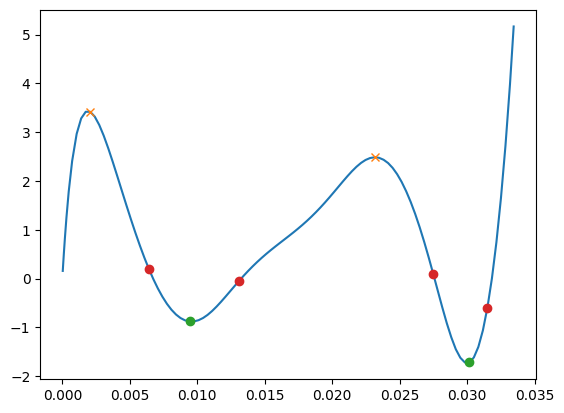

In [46]:
import os 
import numpy as np
folder = os.getcwd()
folder = os.path.dirname(folder)
folder = os.path.join(folder, "APDL\Mechanism")
file = "result3.txt"

file = os.path.join(folder, file)
keys = ["w", "t1", "t2", "t3", "BL1", "BL2", "h", "sl", "st", "Lr1", "L1", "beta1", "beta2", "beta3", "alpha"]

header = np.loadtxt(file, delimiter=",", max_rows=1)
data = np.loadtxt(file, delimiter=",", skiprows=1)
params = {k:v for k,v in zip(keys, header)}

from scipy.signal import find_peaks

peaks= find_peaks(data[:,2], height=0)


zero_crossings=np.where(np.diff(np.sign(data[:,2]), n=1))

troughs = find_peaks(-data[:,2], height=0)


import matplotlib.pyplot as plt

plt.plot(data[:,1], data[:,2])
plt.plot(data[peaks[0],1], data[peaks[0],2], "x")
plt.plot(data[troughs[0],1], data[troughs[0],2], "o")
plt.plot(data[zero_crossings[0],1], data[zero_crossings[0],2], "o")
plt.show()


In [52]:
th_3(data[peaks[0][0],1]).evalf()


0.0405313092117474